## Import & constantes

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f')

# Dossier
RAW_DIR = "../data/raw"
PROC_DIR = "../data/processed"
os.makedirs(RAW_DIR, exist_ok=True)
os.makedirs(PROC_DIR, exist_ok=True)

# Paramètres dataset (mois de référence pour l'EDA)
DS_MONTH = "2023-01"
URL = f"https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{DS_MONTH}.parquet"
RAW_PATH = f"{RAW_DIR}/yellow_tripdata_{DS_MONTH}.parquet"

# Colonnes utiles (disponible sur 2023+)
USE_COLS = [
    "tpep_pickup_datetime", "tpep_dropoff_datetime",
    "passenger_count", "trip_distance",
    "PULocationID", "DOLocationID",
    "RatecodeID", "payment_type",
    "fare_amount", "extra", "mta_tax", 
    "tip_amount", "tolls_amount", "improvement_surcharge",
    "total_amount", "congestion_surcharge", "airport_fee"
]

## Téléchargement sécurisé (idempotent)

In [2]:
import urllib.request

if not os.path.exists(RAW_PATH):
    print("Téléchargement du dataset...")
    urllib.request.urlretrieve(URL, RAW_PATH)
else:
    print("Déjà présent :", RAW_PATH)

Déjà présent : ../data/raw/yellow_tripdata_2023-01.parquet


## Chargment mémoire-friendly

In [3]:
# Lecture partielle des colonnes pour réduire la RAM
df = pd.read_parquet(RAW_PATH, columns=USE_COLS)
df.shape, df.head(3)

((3066766, 17),
   tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
 0  2023-01-01 00:32:10   2023-01-01 00:40:36             %.2f           %.2f   
 1  2023-01-01 00:55:08   2023-01-01 01:01:27             %.2f           %.2f   
 2  2023-01-01 00:25:04   2023-01-01 00:37:49             %.2f           %.2f   
 
    PULocationID  DOLocationID  RatecodeID  payment_type  fare_amount  extra  \
 0           161           141        %.2f             2         %.2f   %.2f   
 1            43           237        %.2f             1         %.2f   %.2f   
 2            48           238        %.2f             1         %.2f   %.2f   
 
    mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  \
 0     %.2f        %.2f          %.2f                   %.2f          %.2f   
 1     %.2f        %.2f          %.2f                   %.2f          %.2f   
 2     %.2f        %.2f          %.2f                   %.2f          %.2f   
 
    congestion_surchar

## Typage & valeurs manquantes

In [4]:
df.info()
df.isna().mean().sort_values(ascending=False).head(10)
df.describe(include='all').T.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[us]
 1   tpep_dropoff_datetime  datetime64[us]
 2   passenger_count        float64       
 3   trip_distance          float64       
 4   PULocationID           int64         
 5   DOLocationID           int64         
 6   RatecodeID             float64       
 7   payment_type           int64         
 8   fare_amount            float64       
 9   extra                  float64       
 10  mta_tax                float64       
 11  tip_amount             float64       
 12  tolls_amount           float64       
 13  improvement_surcharge  float64       
 14  total_amount           float64       
 15  congestion_surcharge   float64       
 16  airport_fee            float64       
dtypes: datetime64[us](2), float64(12), int64(3)
memory usage: 397.8 M

,count,mean,min,25%,50%,75%,max,std
tpep_pickup_datetime,3066766,2023-01-17 00:22:26.288164,2008-12-31 23:01:42,2023-01-09 16:21:57.250000,2023-01-17 08:42:29.500000,2023-01-24 16:26:27,2023-02-01 00:56:53,NaN
tpep_dropoff_datetime,3066766,2023-01-17 00:38:06.427874,2009-01-01 14:29:11,2023-01-09 16:37:06,2023-01-17 08:58:30.500000,2023-01-24 16:42:49,2023-02-02 09:28:47,NaN
passenger_count,%.2f,%.2f,%.2f,%.2f,%.2f,%.2f,%.2f,%.2f
trip_distance,%.2f,%.2f,%.2f,%.2f,%.2f,%.2f,%.2f,%.2f
PULocationID,%.2f,%.2f,%.2f,%.2f,%.2f,%.2f,%.2f,%.2f
DOLocationID,%.2f,%.2f,%.2f,%.2f,%.2f,%.2f,%.2f,%.2f
RatecodeID,%.2f,%.2f,%.2f,%.2f,%.2f,%.2f,%.2f,%.2f
payment_type,%.2f,%.2f,%.2f,%.2f,%.2f,%.2f,%.2f,%.2f
fare_amount,%.2f,%.2f,%.2f,%.2f,%.2f,%.2f,%.2f,%.2f
extra,%.2f,%.2f,%.2f,%.2f,%.2f,%.2f,%.2f,%.2f


## Cibles & features manquantes
On vise une régression **trip_duration_minutes**. 
**Hypothèse métier** (assumée et documentée):
`trip_distance` au moment de la prédiction provient d'un service de routage (proxy de la distance prévue). On ne l'a pas "vraiment" au pickup dans ce dataset, donc on **documente** l'approximation pour éviter la **data leakage confusion**. 

In [6]:
df["pickup_dt"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["dropoff_dt"] = pd.to_datetime(df["tpep_dropoff_datetime"])
df["trip_duration_minutes"] = (df["dropoff_dt"] - df["pickup_dt"]).dt.total_seconds() / 60

# Features temporelles (utilisables au pickup)
df["pickup_hour"] = df["pickup_dt"].dt.hour
df["pickup_dow"] = df["pickup_dt"].dt.dayofweek  # 0=lundi
df["is_weekend"] = df["pickup_dow"].isin([5, 6]).astype(int)

## Règles d'hygiène (filtre simples)
Se débarasser des valeurs absurdes pour éviter d'entraîner un modèle sur du bruit. 

In [7]:
# Bornes (conservatrices) pour éviter les outliers manifestes
mask = (
    (df["trip_duration_minutes"].between(1, 180, inclusive="both")) &
    (df["trip_distance"].between(0.1, 100, inclusive="both")) &
    (df["fare_amount"].between(0, 300, inclusive="both")) &
    (df["passenger_count"].fillna(1).between(1, 6, inclusive="both"))
)
clean = df[mask].copy()
clean.shape

(2935606, 24)

**Pièges**
- Trop filtrer -> perdre la représentativité et biaiser la dérive. 
- Peu filtrer -> métriques gonflées artificiellement.
On ajuste plus finement après quelques visualisations. 

## Visuals EDA (rapides et utiles)

### Distributions clés

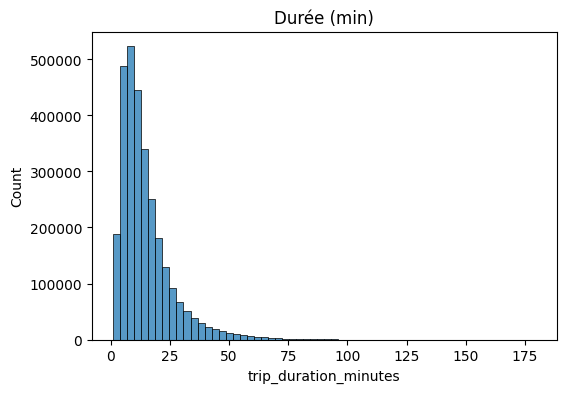

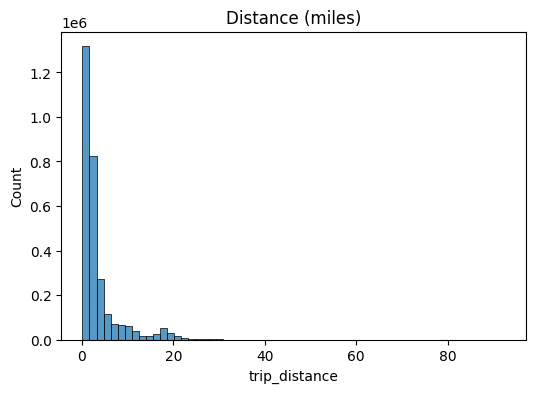

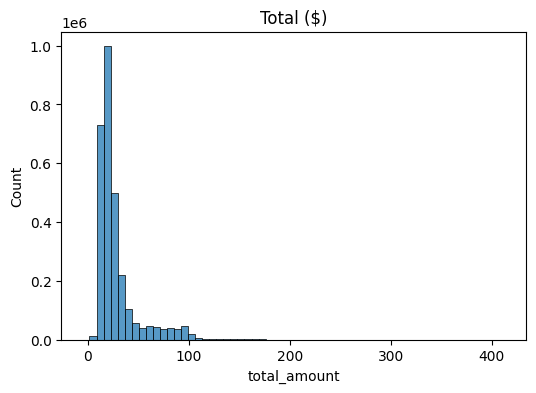

In [8]:
plt.figure(figsize=(6,4)); sns.histplot(clean["trip_duration_minutes"], bins=60); plt.title("Durée (min)"); plt.show()
plt.figure(figsize=(6,4)); sns.histplot(clean["trip_distance"], bins=60); plt.title("Distance (miles)"); plt.show()
plt.figure(figsize=(6,4)); sns.histplot(clean["total_amount"], bins=60); plt.title("Total ($)"); plt.show()

### Relation distance <-> durée 

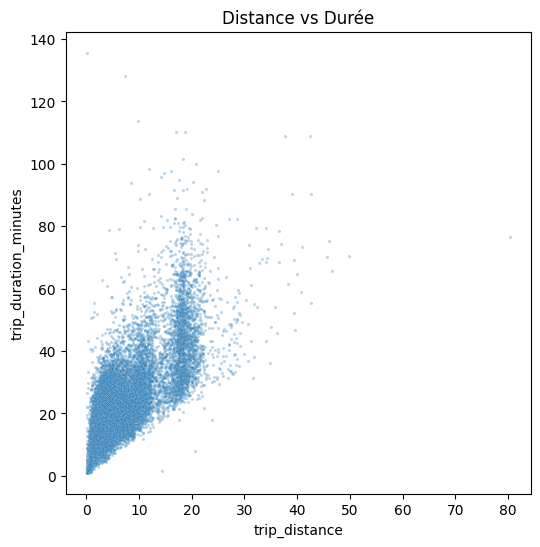

In [9]:
sample = clean.sample(min(50000, len(clean)), random_state=42)
plt.figure(figsize=(6,6))
sns.scatterplot(data=sample, x="trip_distance", y="trip_duration_minutes", s=5, alpha=0.3)
plt.title("Distance vs Durée")
plt.show()

### Effet heure & jour

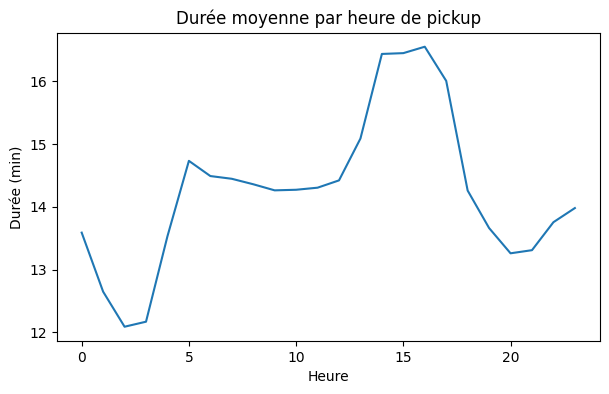

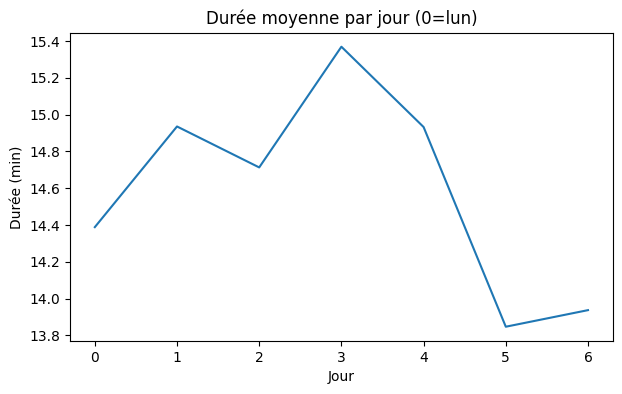

In [10]:
fig, ax = plt.subplots(figsize=(7,4))
clean.groupby("pickup_hour")["trip_duration_minutes"].mean().plot(ax=ax)
ax.set_title("Durée moyenne par heure de pickup"); ax.set_xlabel("Heure"); ax.set_ylabel("Durée (min)")
plt.show()

fig, ax = plt.subplots(figsize=(7,4))
clean.groupby("pickup_dow")["trip_duration_minutes"].mean().plot(ax=ax)
ax.set_title("Durée moyenne par jour (0=lun)"); ax.set_xlabel("Jour"); ax.set_ylabel("Durée (min)")
plt.show()

**Bonnes pratiques**
- Garde ces graphiques "référence" pour la dérive temporelle (baselin = ce mois). 
- On figera un **profil de référence** (Evidently) à partir d'une **fenêtre d'entraînement**. 

## Échantillon "référence" sauvegardé
On sauve un **échantillon propre** qu'on versionnera (petit) -> reproductible.

In [11]:
N = 200_000 if len(clean) >= 200_000 else len(clean)
ref = clean.sample(N, random_state=42)

FEATS_KEEP = [
    # target
    "trip_duration_minutes",
    #cfeatures utilisables en ligne (cf. hypothèse distance)
    "trip_distance", "passenger_count",
    "PULocationID", "DOLocationID",
    "pickup_hour", "pickup_dow", "is_weekend",
    "RatecodeID", "payment_type",
    # coûts (pour analyse/monitoring, pas nécessairement en features finales)
    "fare_amount", "tip_amount", "tolls_amount", "total_amount"
]
ref = ref[FEATS_KEEP].copy()

OUT_PATH = f"{PROC_DIR}/taxi_ref_{DS_MONTH}_clean_sample.parquet"
ref.to_parquet(OUT_PATH, index=False)
OUT_PATH, ref.shape, ref.head(3)

('../data/processed/taxi_ref_2023-01_clean_sample.parquet',
 (200000, 14),
          trip_duration_minutes  trip_distance  passenger_count  PULocationID  \
 148600                    %.2f           %.2f             %.2f           143   
 1782591                   %.2f           %.2f             %.2f           166   
 2583709                   %.2f           %.2f             %.2f           161   
 
          DOLocationID  pickup_hour  pickup_dow  is_weekend  RatecodeID  \
 148600            239            8           1           0        %.2f   
 1782591           151           20           3           0        %.2f   
 2583709           142           18           4           0        %.2f   
 
          payment_type  fare_amount  tip_amount  tolls_amount  total_amount  
 148600              2         %.2f        %.2f          %.2f          %.2f  
 1782591             1         %.2f        %.2f          %.2f          %.2f  
 2583709             1         %.2f        %.2f          %.2f  

**À retenir**
- **data/raw/* non versionné, data/processed/*** oui (samples petits). 
- On documente clairement **l'hypothèse "distance prévue"** pour éviter tout procès en fuite. 